# Import

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("./df_fig.csv")

In [3]:
head(df)

,X,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,0,fivenodes,STGCN,0.0,,2,12,,50,0.7293743,80.98522,GConvGRU
2,1,fivenodes,STGCN,0.0,,2,12,,50,0.7290817,80.89179,GConvGRU
3,2,fivenodes,STGCN,0.7,rand,2,12,linear,50,1.8922616,81.97655,GConvGRU
4,3,fivenodes,STGCN,0.7,rand,2,12,nearest,50,2.2112885,87.80387,GConvGRU
5,4,fivenodes,STGCN,0.8,rand,2,12,linear,50,2.0728178,103.64874,GConvGRU
6,5,fivenodes,STGCN,0.8,rand,2,12,nearest,50,2.5664744,98.34010,GConvGRU


# fivenode

In [4]:
fivenodes <- data.frame(rbind(
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==2 & epoch==50 & model=='GConvGRU'  & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==2 & epoch==50 & model=='GConvLSTM' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==2 & epoch==50 & model=='GCLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==2 & epoch==50 & model=='LRGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==2 & epoch==50 & model=='DyGrEncoder' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & lags==2 & epoch==50 & model=='EvolveGCNH' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & lags==2 & epoch==50 & model=='EvolveGCNO' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==2 & epoch==50 & model=='TGCN' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==2 & lags==2 & epoch==50 & model=='DCRNN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8))))

In [5]:
fivenodes$model <- factor(fivenodes$model, levels = c("GConvGRU","GConvLSTM","GCLSTM","LRGCN","DyGrEncoder","EvolveGCNH","EvolveGCNO","TGCN","DCRNN"))
fivenodes$method <- factor(fivenodes$method, levels = c('STGCN','IT-STGCN'))

## 후보 1

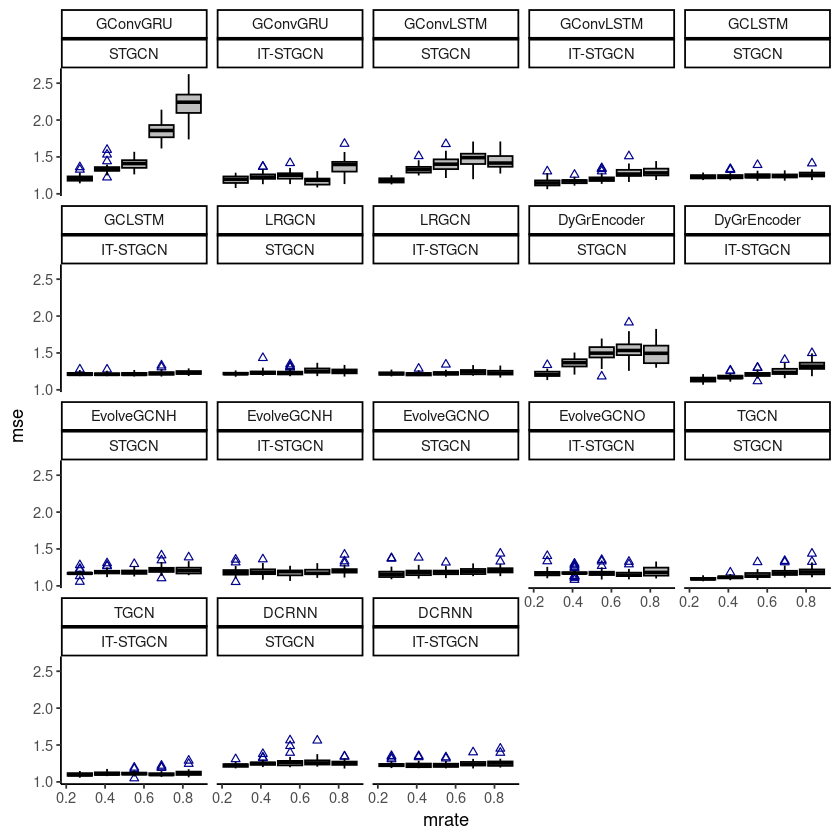

In [6]:
ggplot(fivenodes, aes(x=mrate,y= mse,group=mrate)) + facet_wrap(model~method) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()
# ggsave("random_list_fivenodes.png")

## 후보 2

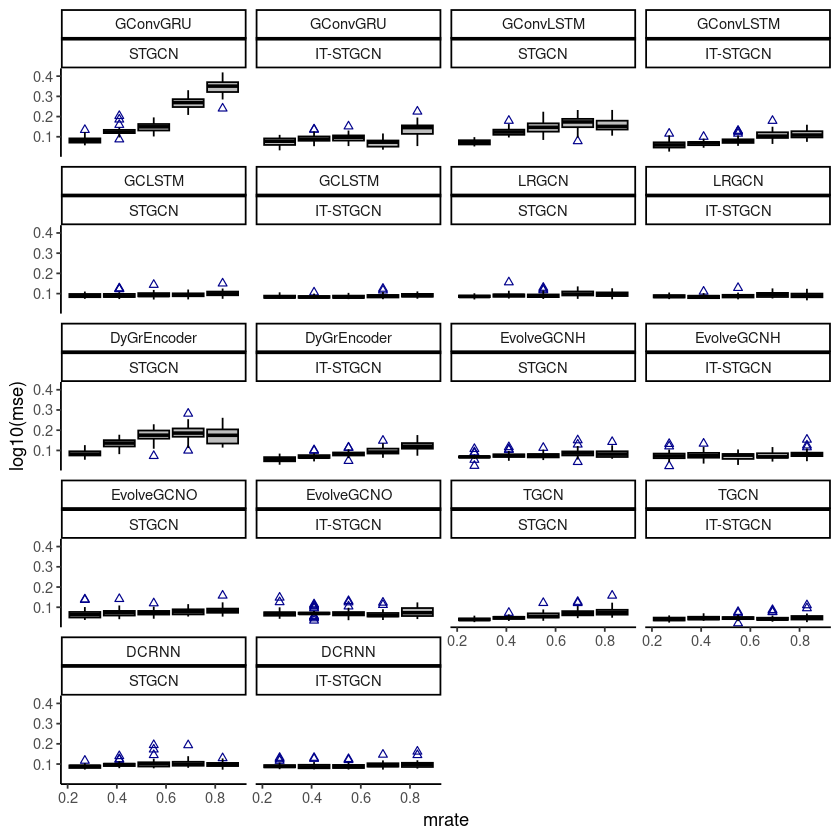

In [7]:
ggplot(fivenodes, aes(x=mrate,y= log10(mse),group=mrate)) + facet_wrap(model~method,,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + 
theme_classic() 
# ggsave("random_list_fivenodes.png")

## 후보 3

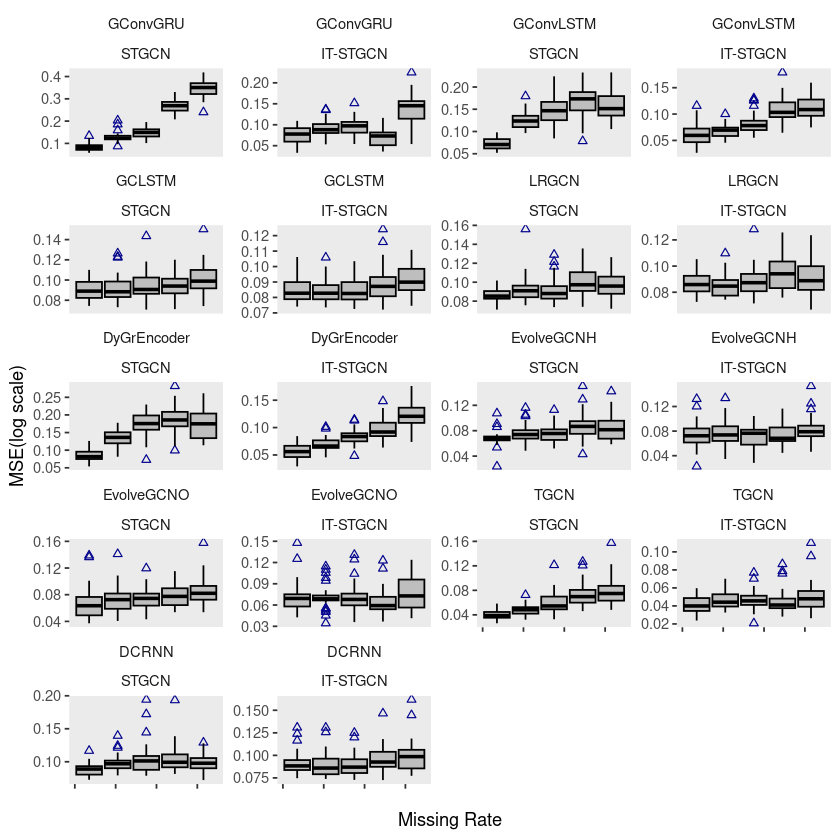

In [8]:
ggplot(fivenodes, aes(x = mrate, y = log10(mse), group = mrate)) +
  geom_boxplot(fill = 'grey', color = 'black', width = 0.7, outlier.color = 'darkblue', outlier.shape = 2) +
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank()) +
  facet_wrap(model ~ method, ncol = 4, scales = "free_y",) +
  xlab("Missing Rate") +
  ylab("MSE(log scale)") +
  scale_x_continuous(labels=c('','','','',''))
# ggsave("random_list_fivenodes.pdf")

## 후보 4

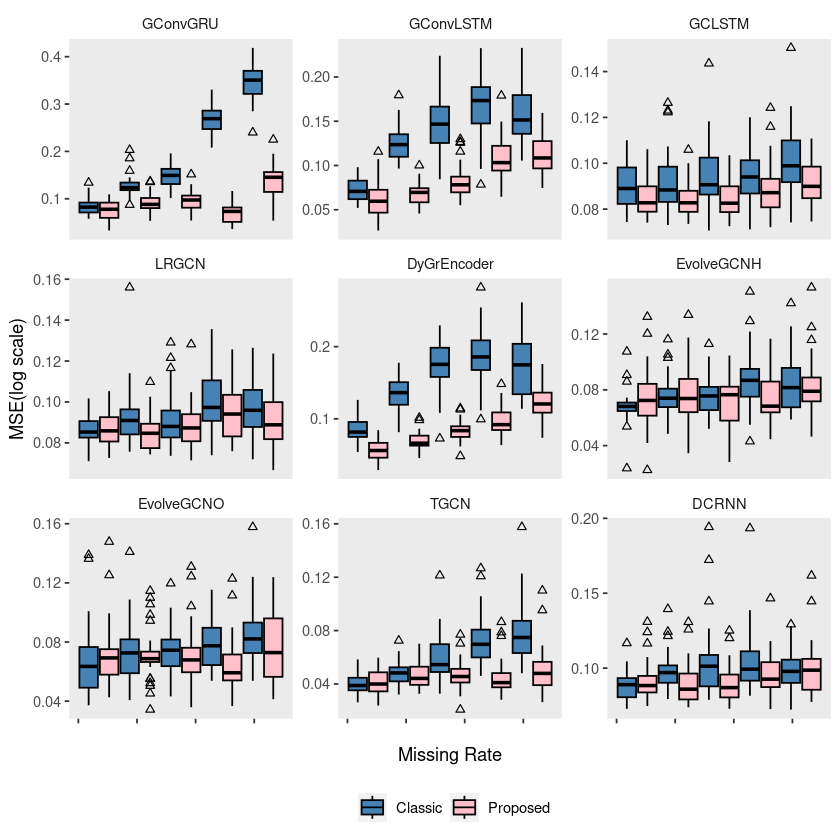

In [42]:
ggplot(fivenodes, aes(x = mrate, y = log10(mse), group = interaction(mrate, method))) +
  geom_boxplot(aes(fill = method), color = 'black', width = 0.7, outlier.color = 'black', outlier.shape = 2) +
  scale_fill_manual(values = c("steelblue", "pink"), labels=c('Classic', 'Proposed')) +
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank(),
       legend.position = 'bottom') +
  labs(x = "Missing Rate", y = "MSE(log scale)", fill = "") +
  scale_x_continuous(labels = c('', '', '', '', '')) +
  facet_wrap(~model, ncol = 3, scales = "free_y")
# ggsave("random_list_fivenodes.pdf")

# ChickenpoxDatasetLoader(lags=4)

In [10]:
chickenpox <- rbind(
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='GConvGRU'  & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==32 & lags==4 & epoch==50 & model=='GConvLSTM' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='GCLSTM'  & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==8 & lags==4 & epoch==50 & model=='LRGCN' &  
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNH' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNO' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>%filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='TGCN'  &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>%filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='DCRNN'  &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)))

In [11]:
chickenpox$model <- factor(chickenpox$model, levels = c("GConvGRU","GConvLSTM","GCLSTM","LRGCN","DyGrEncoder","EvolveGCNH","EvolveGCNO","TGCN","DCRNN"))
chickenpox$method <- factor(chickenpox$method, levels = c('STGCN','IT-STGCN'))

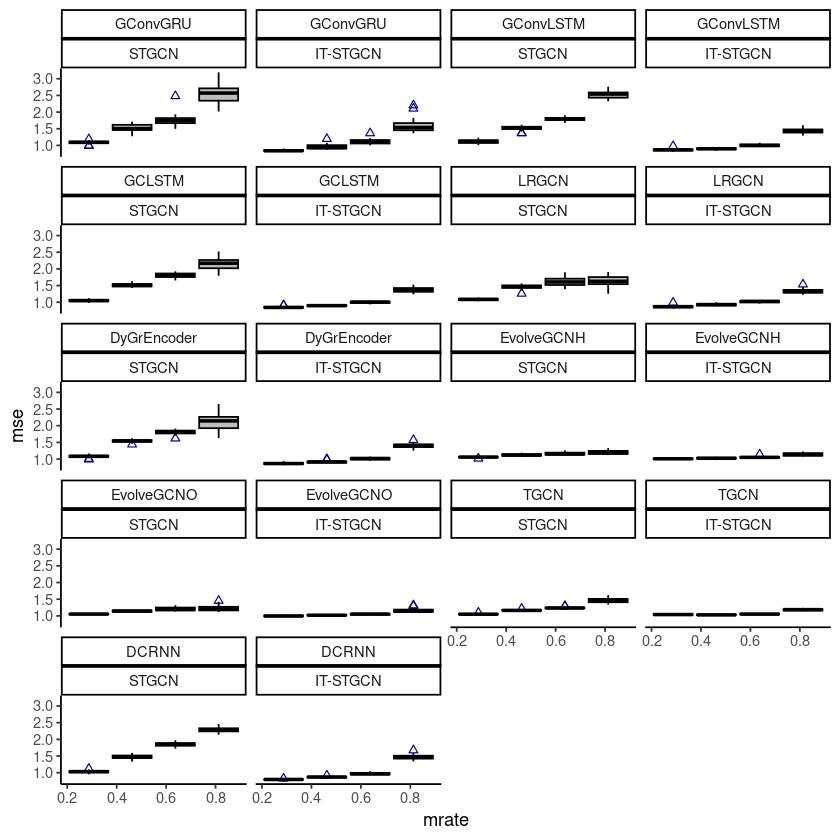

In [12]:
ggplot(chickenpox, aes(x=mrate,y= mse,group=mrate)) + facet_wrap(model~method,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()

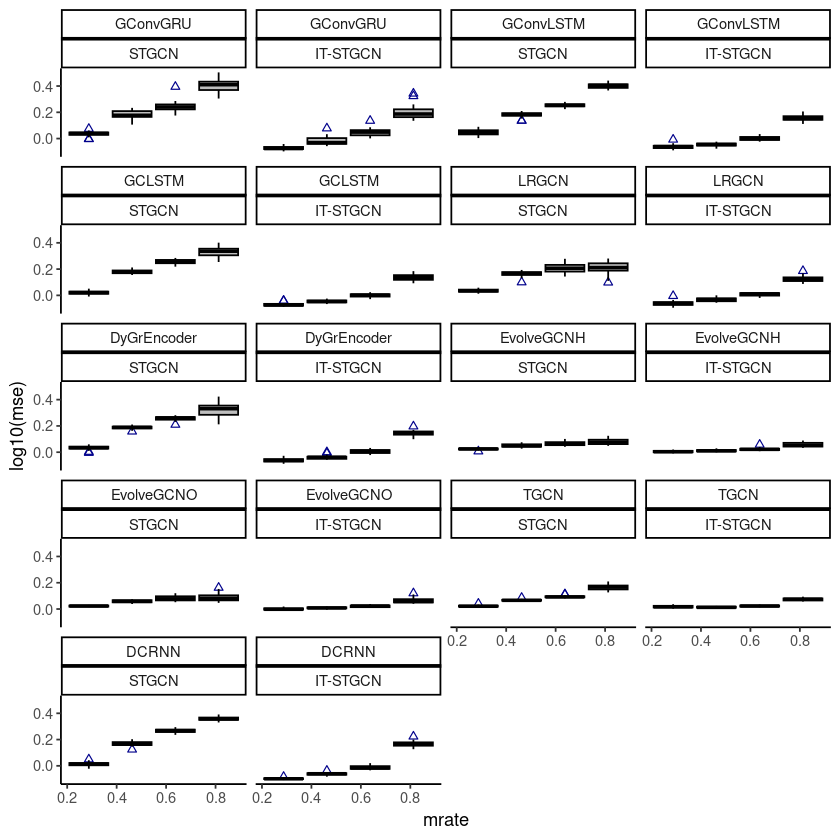

In [13]:
ggplot(chickenpox, aes(x=mrate,y= log10(mse),group=mrate)) + facet_wrap(model~method,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()

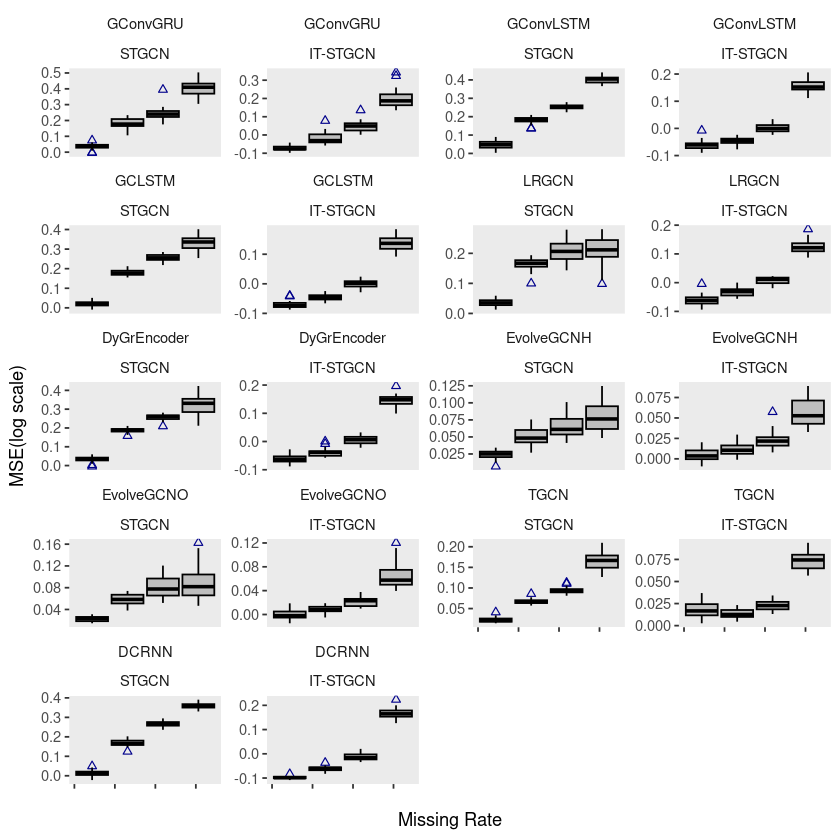

In [14]:
ggplot(chickenpox, aes(x=mrate,y= log10(mse),group=mrate)) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + 
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank()) +
  facet_wrap(model ~ method, ncol = 4, scales = "free_y") +
  xlab("Missing Rate") +
  ylab("MSE(log scale)") +
  scale_x_continuous(labels=c('','','','',''))
# ggsave("random_list_chickenpox.pdf")

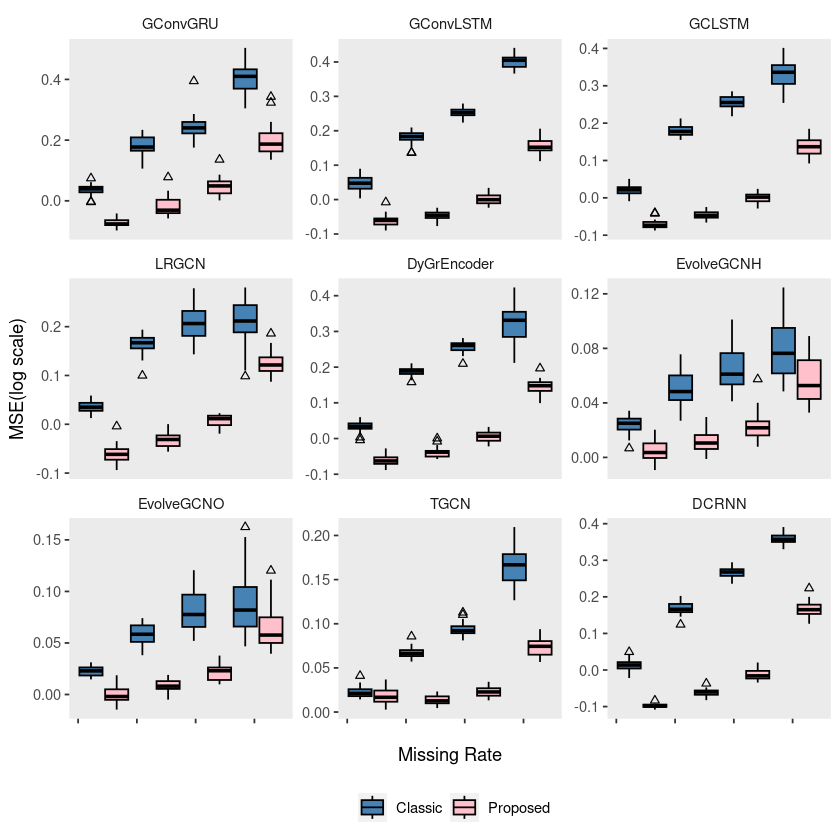

In [43]:
ggplot(chickenpox, aes(x = mrate, y = log10(mse), group = interaction(mrate, method))) +
  geom_boxplot(aes(fill = method), color = 'black', width = 0.7, outlier.color = 'black', outlier.shape = 2) +
  scale_fill_manual(values = c("steelblue", "pink"), labels=c('Classic', 'Proposed')) +
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank(),
       legend.position = 'bottom') +
  labs(x = "Missing Rate", y = "MSE(log scale)", fill = "") +
  scale_x_continuous(labels = c('', '', '', '', '')) +
  facet_wrap(~model, ncol = 3, scales = "free_y")
# ggsave("random_list_chickenpox.pdf")

# PedalMeDatasetLoader (lags=4)

In [16]:
pedalme <- rbind(
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvGRU' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==2 & lags==4 & epoch==50 & model=='GConvLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==4 & epoch==50 & model=='GCLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==8 & lags==4 & epoch==50 & model=='LRGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNH' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNO' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='TGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==8 & lags==4 & epoch==50 & model=='DCRNN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)))

In [17]:
pedalme$model <- factor(pedalme$model, levels = c("GConvGRU","GConvLSTM","GCLSTM","LRGCN","DyGrEncoder","EvolveGCNH","EvolveGCNO","TGCN","DCRNN"))
pedalme$method <- factor(pedalme$method, levels = c('STGCN','IT-STGCN'))

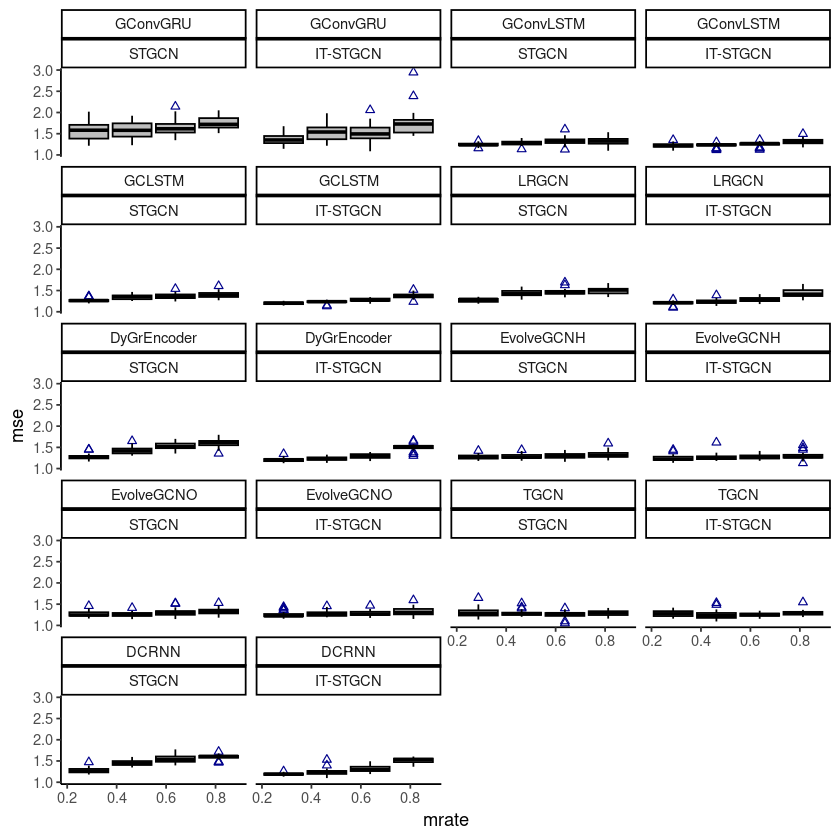

In [18]:
ggplot(pedalme, aes(x=mrate,y= mse,group=mrate)) + facet_wrap(model~method,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()

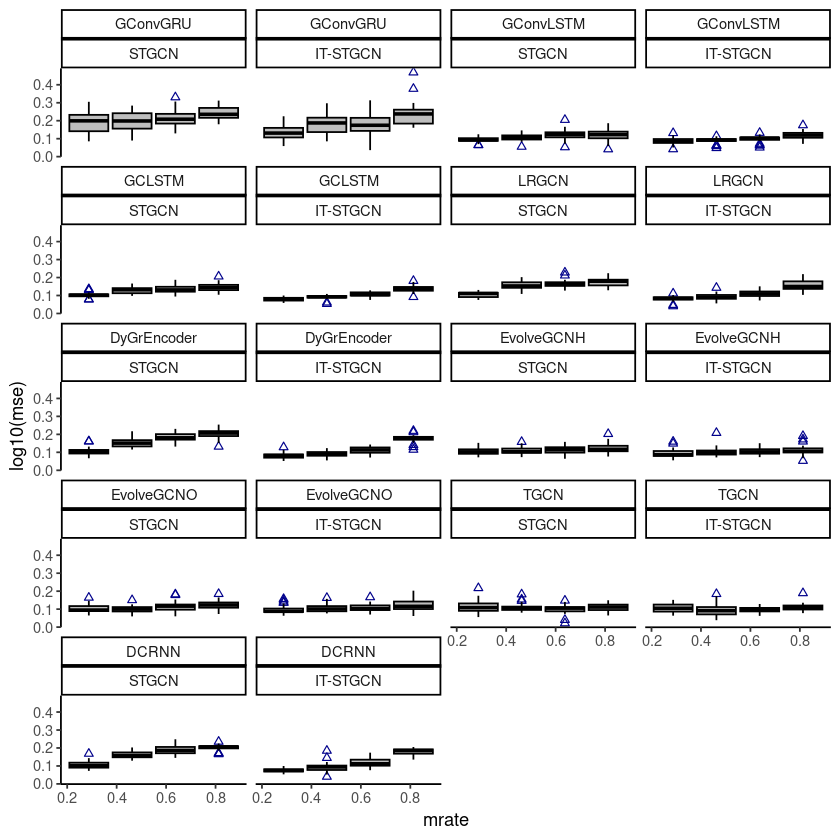

In [19]:
ggplot(pedalme, aes(x=mrate,y= log10(mse),group=mrate)) + facet_wrap(model~method,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()

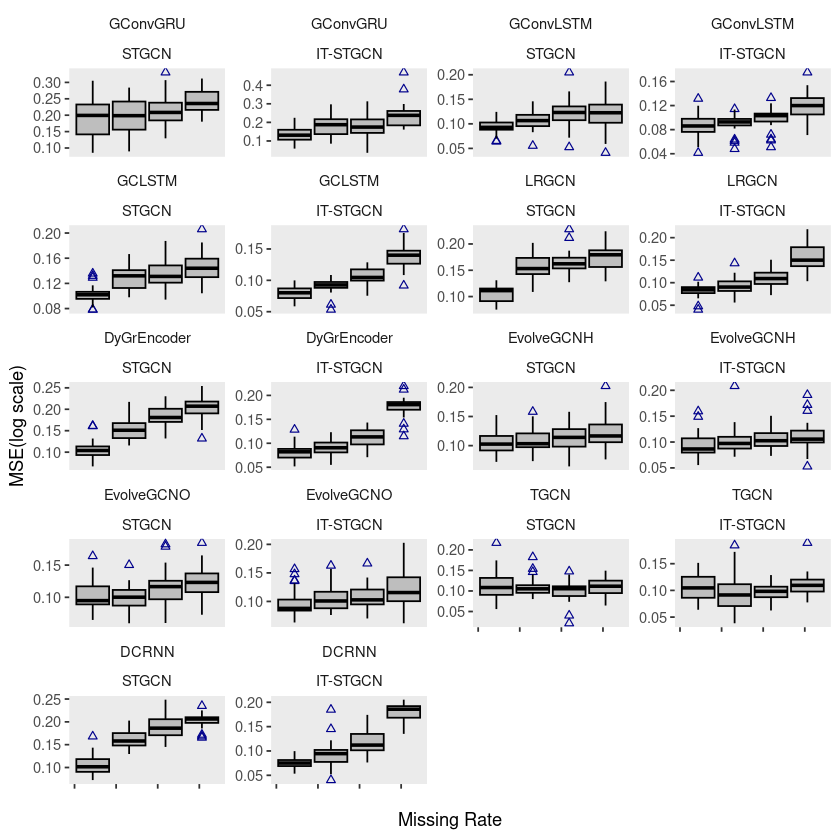

In [20]:
ggplot(pedalme, aes(x=mrate,y= log10(mse),group=mrate)) +
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + 
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank()) +
  facet_wrap(model ~ method, ncol = 4, scales = "free_y") +
  xlab("Missing Rate") +
  ylab("MSE(log scale)") +
  scale_x_continuous(labels=c('','','','',''))
# ggsave("random_list_pedalme.pdf")

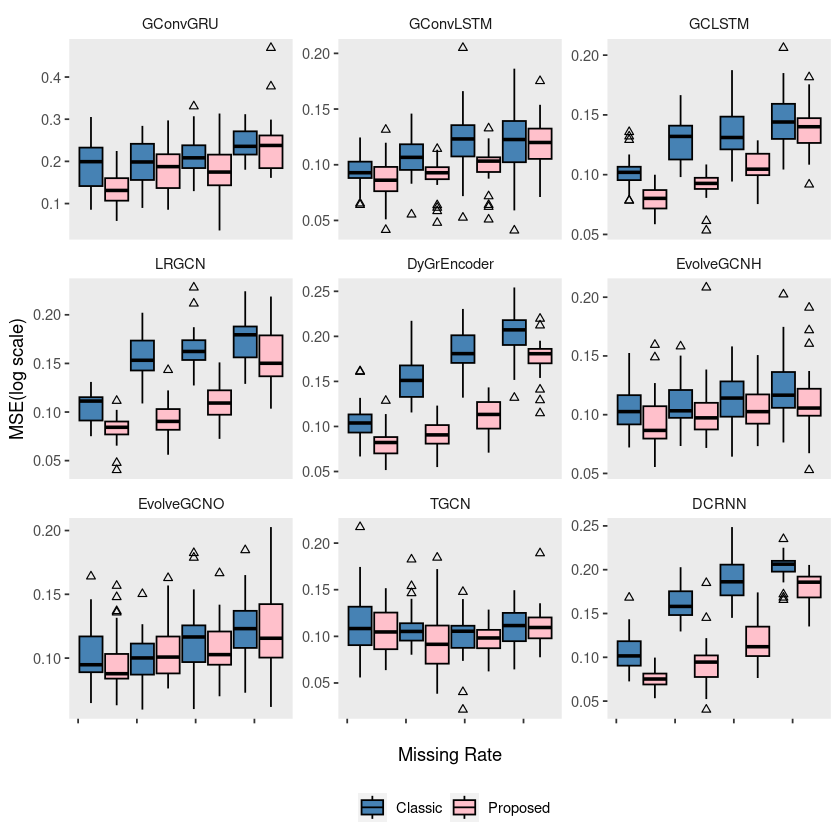

In [44]:
ggplot(pedalme, aes(x = mrate, y = log10(mse), group = interaction(mrate, method))) +
  geom_boxplot(aes(fill = method), color = 'black', width = 0.7, outlier.color = 'black', outlier.shape = 2) +
  scale_fill_manual(values = c("steelblue", "pink"), labels=c('Classic', 'Proposed')) +
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank(),
       legend.position = 'bottom') +
  labs(x = "Missing Rate", y = "MSE(log scale)", fill = "") +
  scale_x_continuous(labels = c('', '', '', '', '')) +
  facet_wrap(~model, ncol = 3, scales = "free_y")
# ggsave("random_list_pedalme.pdf")

# WikiMathsDatasetLoader (lags=8)

In [22]:
wikimath <- rbind(
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='GConvGRU' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==64 & lags==8 & epoch==50 & model=='GConvLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==64 & lags==8 & epoch==50 & model=='GCLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==32 & lags==8 & epoch==50 & model=='LRGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='DyGrEncoder' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNH' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNO' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='TGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='DCRNN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)))

In [23]:
wikimath$model <- factor(wikimath$model, levels = c("GConvGRU","GConvLSTM","GCLSTM","LRGCN","DyGrEncoder","EvolveGCNH","EvolveGCNO","TGCN","DCRNN"))
wikimath$method <- factor(wikimath$method, levels = c('STGCN','IT-STGCN'))

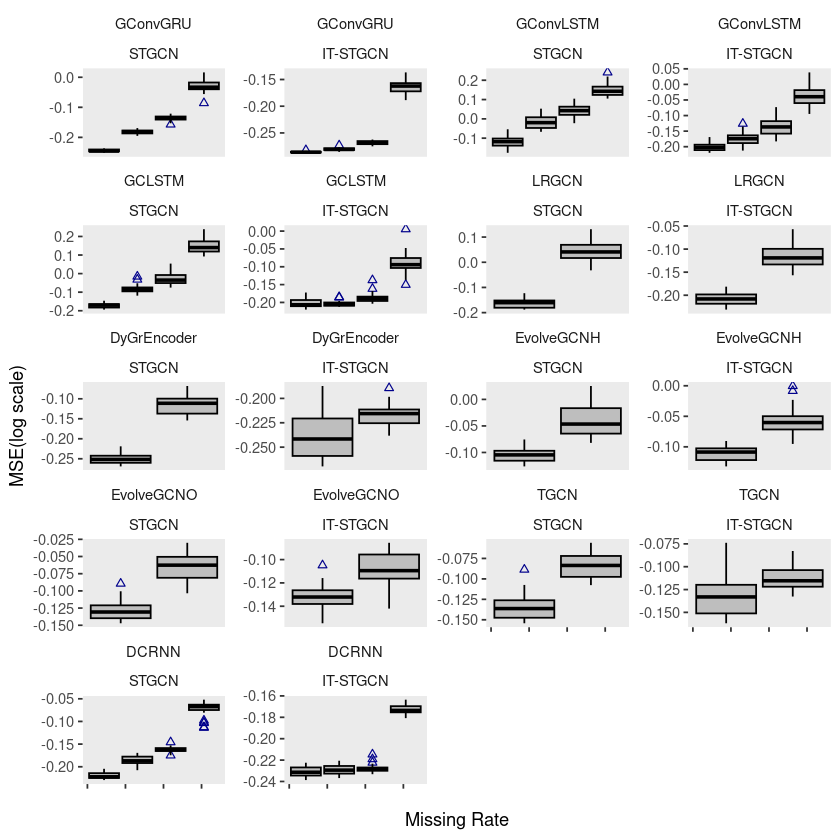

In [24]:
ggplot(wikimath, aes(x=mrate,y= log10(mse),group=mrate)) +
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + 
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank()) +
  facet_wrap(model ~ method, ncol = 4, scales = "free_y") +
  xlab("Missing Rate") +
  ylab("MSE(log scale)") +
  scale_x_continuous(labels=c('','','','',''))
# ggsave("random_list_wikimath.pdf")

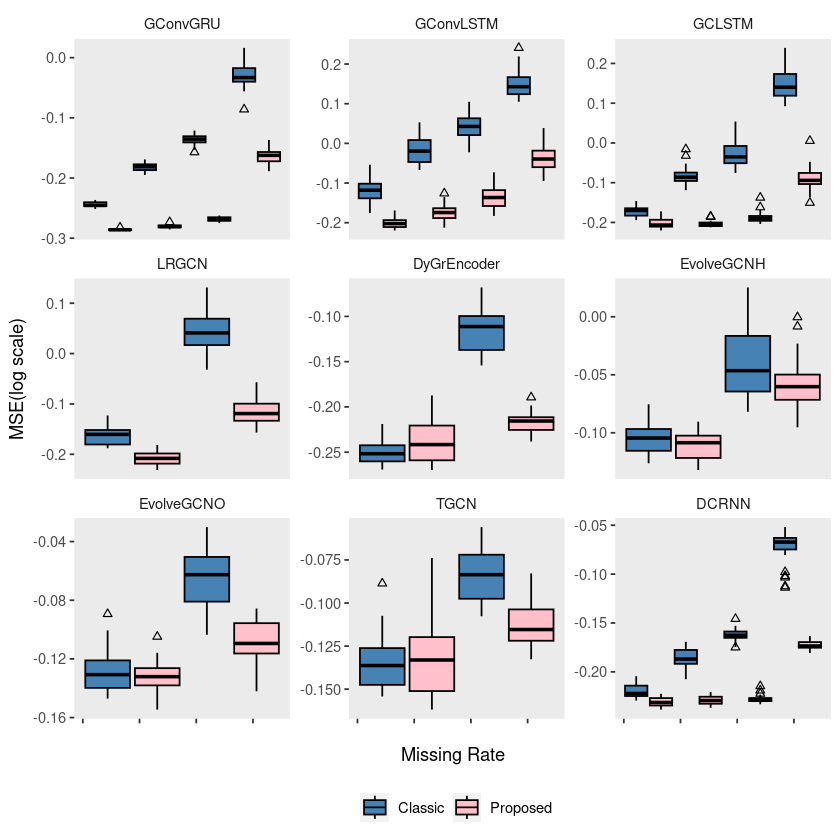

In [45]:
ggplot(wikimath, aes(x = mrate, y = log10(mse), group = interaction(mrate, method))) +
  geom_boxplot(aes(fill = method), color = 'black', width = 0.7, outlier.color = 'black', outlier.shape = 2) +
  scale_fill_manual(values = c("steelblue", "pink"), labels=c('Classic', 'Proposed')) +
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank(),
       legend.position = 'bottom') +
  labs(x = "Missing Rate", y = "MSE(log scale)", fill = "") +
  scale_x_continuous(labels = c('', '', '', '', '')) +
  facet_wrap(~model, ncol = 3, scales = "free_y")
# ggsave("random_list_wikimath.pdf")

# Windmillsmall(lags=8)

In [26]:
windmillsmall <- rbind(
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='GConvGRU' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==8 & epoch==50 & model=='GConvLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==8 & epoch==50 & model=='GCLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='LRGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='DyGrEncoder' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNH' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNO' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='TGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)),
    df %>% filter(dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==8 & epoch==50 & model=='DCRNN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.7)))

In [27]:
windmillsmall$model <- factor(windmillsmall$model, levels = c("GConvGRU","GConvLSTM","GCLSTM","LRGCN","DyGrEncoder","EvolveGCNH","EvolveGCNO","TGCN","DCRNN"))
windmillsmall$method <- factor(windmillsmall$method, levels = c('STGCN','IT-STGCN'))

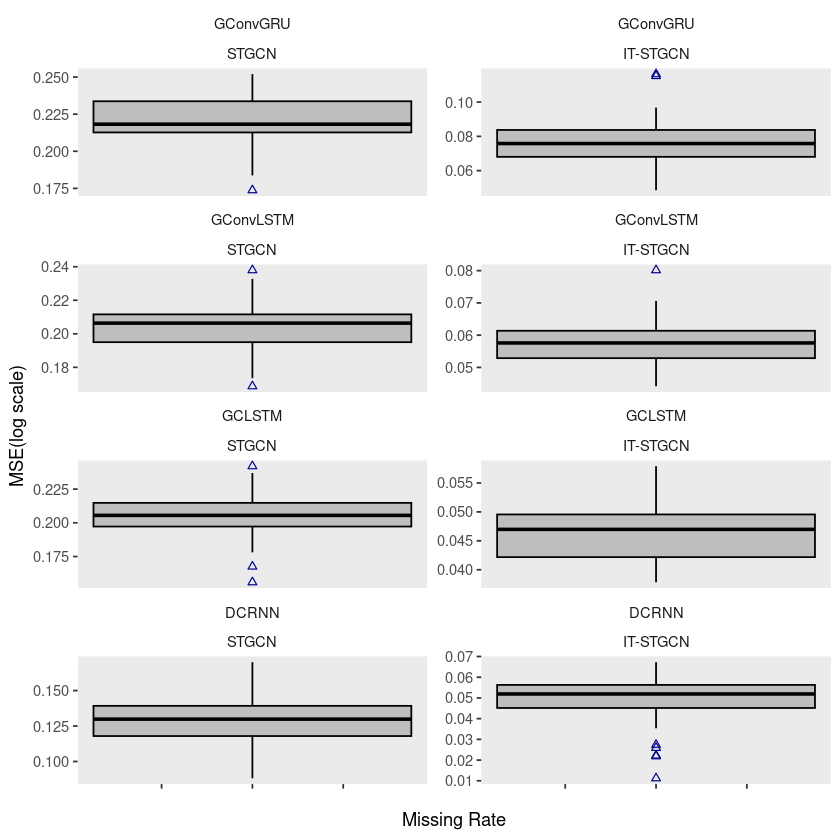

In [28]:
ggplot(windmillsmall, aes(x=mrate,y= log10(mse),group=mrate)) +
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + 
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank()) +
  facet_wrap(model ~ method, ncol = 2, scales = "free_y") +
  xlab("Missing Rate") +
  ylab("MSE(log scale)") +
  scale_x_continuous(labels=c('','','','',''))
# ggsave("random_list_windmill.pdf")

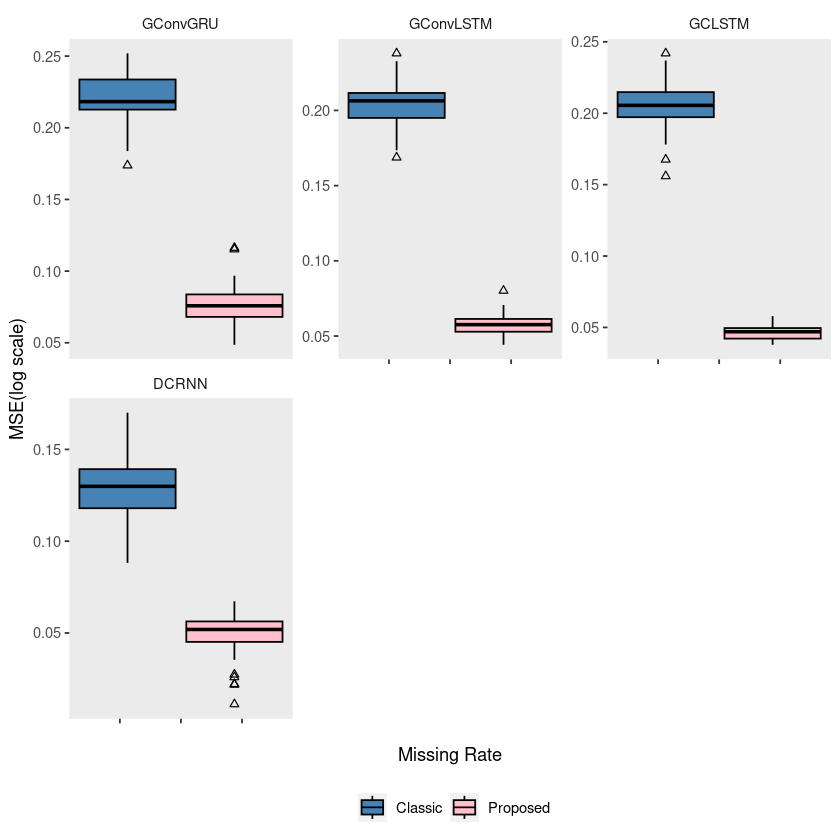

In [46]:
ggplot(windmillsmall, aes(x = mrate, y = log10(mse), group = interaction(mrate, method))) +
  geom_boxplot(aes(fill = method), color = 'black', width = 0.7, outlier.color = 'black', outlier.shape = 2) +
  scale_fill_manual(values = c("steelblue", "pink"), labels=c('Classic', 'Proposed')) +
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank(),
       legend.position = 'bottom') +
  labs(x = "Missing Rate", y = "MSE(log scale)", fill = "") +
  scale_x_continuous(labels = c('', '', '', '', '')) +
  facet_wrap(~model, ncol = 3, scales = "free_y")
# ggsave("random_list_windmill.pdf")

# Montevideobus (lags=4)

In [30]:
monte <- rbind(
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvGRU' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GCLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==2 & lags==4 & epoch==50 & model=='LRGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & lags==4 & epoch==50 & model=='EvolveGCNH' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & lags==4 & epoch==50 & model=='EvolveGCNO' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==8 & lags==4 & epoch==50 & model=='TGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)),
    df %>% filter(dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='DCRNN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.7 | mrate ==  0.8)))

In [31]:
monte$model <- factor(monte$model, levels = c("GConvGRU","GConvLSTM","GCLSTM","LRGCN","DyGrEncoder","EvolveGCNH","EvolveGCNO","TGCN","DCRNN"))
monte$method <- factor(monte$method, levels = c('STGCN','IT-STGCN'))

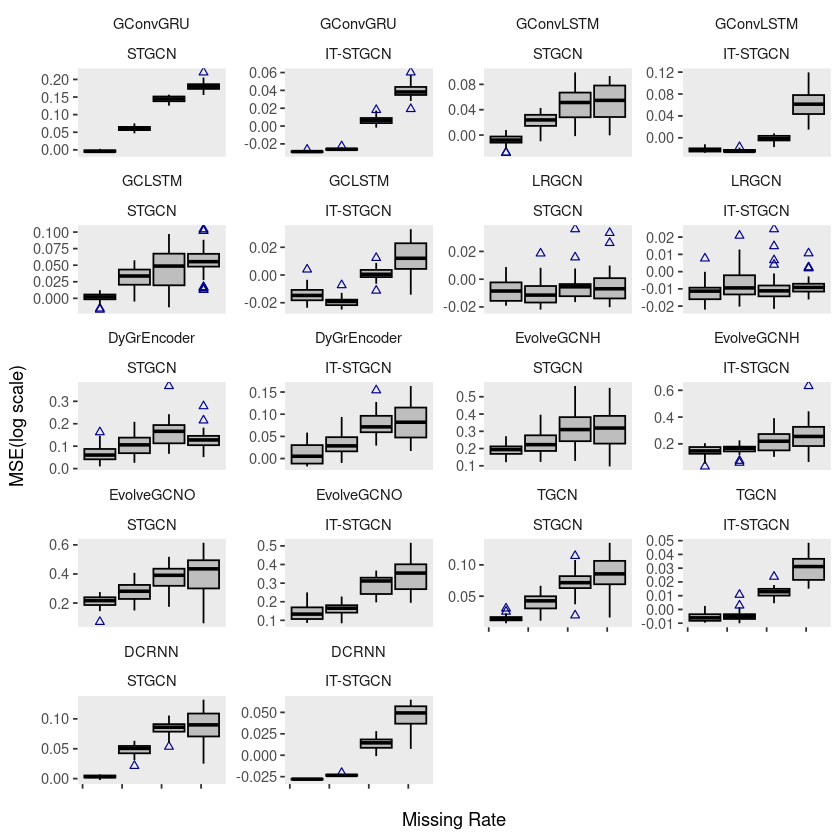

In [32]:
ggplot(monte, aes(x=mrate,y= log10(mse),group=mrate)) + facet_wrap(model~method,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + 
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank()) +
  facet_wrap(model ~ method, ncol = 4, scales = "free_y") +
  xlab("Missing Rate") +
  ylab("MSE(log scale)")+
  scale_x_continuous(labels=c('','','','',''))
# ggsave("random_list_monte.pdf")

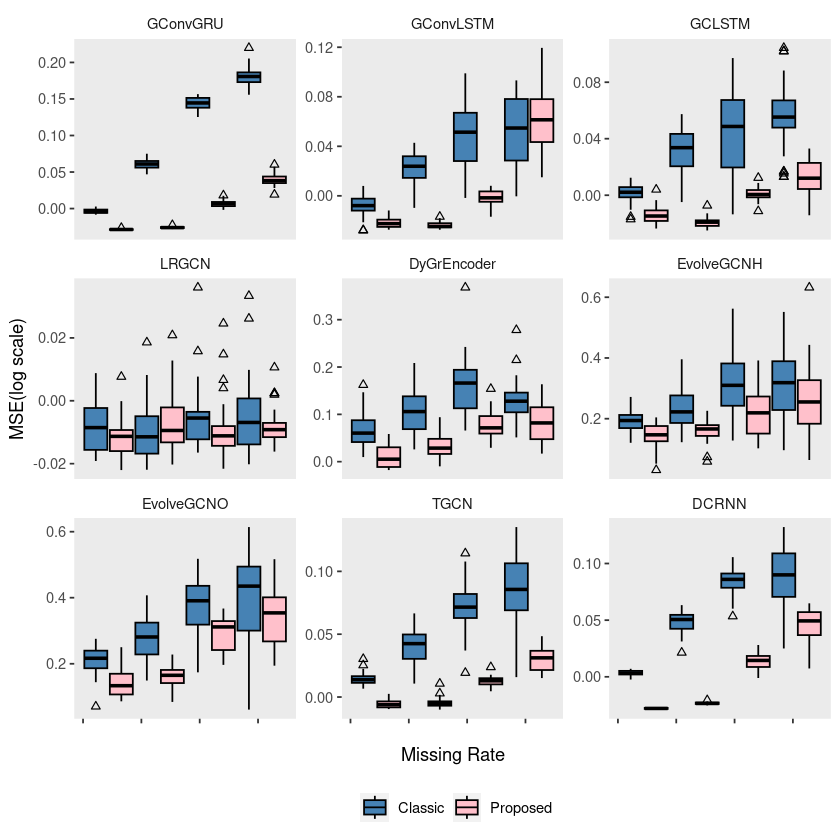

In [47]:
ggplot(monte, aes(x = mrate, y = log10(mse), group = interaction(mrate, method))) +
  geom_boxplot(aes(fill = method), color = 'black', width = 0.7, outlier.color = 'black', outlier.shape = 2) +
  scale_fill_manual(values = c("steelblue", "pink"), labels=c('Classic', 'Proposed')) +
  theme(strip.background = element_blank(), strip.placement = "outside", panel.grid = element_blank(),
       legend.position = 'bottom') +
  labs(x = "Missing Rate", y = "MSE(log scale)", fill = "") +
  scale_x_continuous(labels = c('', '', '', '', '')) +
  facet_wrap(~model, ncol = 3, scales = "free_y")
# ggsave("random_list_monte.pdf")